Se diseñó un modelo de Ml que permita a los usuarios de la plataforma **mercadolibre** proyectar el mejor precio para compra o venta de vehículos.

Para esto se optó por hacer webscrapping de la pagina web de Mercadolibre subdivision autos pero filtrando la bosqueda por modelo de auto, en este caso de un **Toyota Corolla**.

In [266]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime
import datetime
import urllib
import time
import requests
from bs4 import BeautifulSoup
import re
lista = []
urls = []
index= 1
urls.append('https://autos.mercadolibre.com.mx/corolla/toyota')#Pagina inicial
for page in range(6):
  index += 48
  urls.append('https://autos.mercadolibre.com.mx/toyota/corolla_Desde_'+str(index)+'_NoIndex_True')#Paginas subsecuentes de la busqueda para hacer crawling improvisado
print(urls)
for url in urls:
  #print(url, 'aqui imprimió')
  url_content= requests.get(url).text
  soup = BeautifulSoup(url_content, 'lxml')
  sublist = []
  #print(soup)
  tblContainer = soup.find_all('section', class_ = 'ui-search-results')[0]  #seleccion del tag donde se alojan todos los datos deseados
  #print(tblContainer)
  tblItem = tblContainer.find_all('div', class_= 'ui-search-result__content-wrapper')
  for item in tblItem:
    year_km_list = []
    try:
      price = item.find('span', class_= 'price-tag-fraction').text.strip()  #Busqueda del elemento precio
    except:
      price = 'desconocido'
    try:
      tblyear_milleage = item.find('ul', class_= 'ui-search-card-attributes ui-search-item__group__element') #busqueda de elementos año y kilometraje
      
      for cell in tblyear_milleage.children:
        year_km_list.append(cell.text.strip())
      #year = item.find_all('li', class_='ui-search-card-attributes__attribute')[0].text.strip()
    except:
      year = '2030'
    try:
      milleage = item.find('li', class_='ui-search-card-attributes__attribute')[0].text.strip()
    except:
      milleage = '0'

    try:
      location = item.find('span', class_= 'ui-search-item__group__element ui-search-item__location').text.strip()
      city = location.split('-')[0]           #Busqueda de elementos Ciudad y estado
      state = location.split('-')[1]
    except:
      location = 'Mexico000'

    try:
      desc = item.find('h2', class_= 'ui-search-item__title ui-search-item__group__element').text.strip()
      
      if (' Mt' in desc):                   #Busqueda de elemento transmision
        trans = 'Estandar'
      elif ((' At' in desc) | (' Cvt' in desc)):
        trans = 'Automatico'  
    except:
      trans = 'none'

    # print('Precio: ',price)
    # print('Año:', year_km_list[0])
    # print('Kilometraje', year_km_list[1])
    # print('locacion: ',location )
    # print('Ciudad: ', city)
    # print('Estado: ', state)
    # print('Transmision: ', trans,'\n')
    
    auto = {                                  #Extraccion y almacenamiento de caracteristicas relevantes 
        'Precio':price.replace(',',''),
        'Año': year_km_list[0],
        'Kilometraje': year_km_list[1].replace(' Km','').replace(',',''),
        'Ciudad': city,
        'Estado':  state,
        'Transmision': trans
    }
    lista.append(auto)


['https://autos.mercadolibre.com.mx/corolla/toyota', 'https://autos.mercadolibre.com.mx/toyota/corolla_Desde_49_NoIndex_True', 'https://autos.mercadolibre.com.mx/toyota/corolla_Desde_97_NoIndex_True', 'https://autos.mercadolibre.com.mx/toyota/corolla_Desde_145_NoIndex_True', 'https://autos.mercadolibre.com.mx/toyota/corolla_Desde_193_NoIndex_True', 'https://autos.mercadolibre.com.mx/toyota/corolla_Desde_241_NoIndex_True', 'https://autos.mercadolibre.com.mx/toyota/corolla_Desde_289_NoIndex_True']


In [267]:
#Verificacion de cantidad de datos obtenidos
len(lista)

311

Conversión de datos raspados a un DataFrame

In [268]:
dfAutos = pd.DataFrame(lista)
dfAutos.head(15)

,Precio,Año,Kilometraje,Ciudad,Estado,Transmision
0,236000,2015,68559,Coacalco de Berriozabal,Estado De México,Automatico
1,350000,2020,62040,Coacalco de Berriozabal,Estado De México,Estandar
2,468000,2021,1634,Coacalco de Berriozabal,Estado De México,Automatico
3,193000,2013,45965,Naucalpan,Estado De México,Automatico
4,354000,2020,32851,Coacalco de Berriozabal,Estado De México,Automatico
5,369000,2019,64551,Iztapalapa,Distrito Federal,Automatico
6,443000,2020,48000,Zapopan,Jalisco,Automatico
7,419000,2020,107178,Zapopan,Jalisco,Automatico
8,243000,2017,71000,Gustavo A. Madero,Distrito Federal,Automatico
9,448900,2022,0,Zapopan,Jalisco,Automatico


Se detecta que todos los datos del dataframe los trata como texto, se procede a cambiarlos de tipo

In [269]:
dfAutos.describe()

,Precio,Año,Kilometraje,Ciudad,Estado,Transmision
count,311,311,311,311,311,311
unique,211,18,244,82,26,2
top,359000,2020,100000,Guadalajara,Distrito Federal,Automatico
freq,6,69,5,26,89,272


In [270]:
#se detecta que todas las columnas son tipo OBJ
dfAutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Precio       311 non-null    object
 1   Año          311 non-null    object
 2   Kilometraje  311 non-null    object
 3   Ciudad       311 non-null    object
 4   Estado       311 non-null    object
 5   Transmision  311 non-null    object
dtypes: object(6)
memory usage: 14.7+ KB


**Analisis exploratorio de los datos**

In [271]:
#Cambio de tipo de dato a las columnas precio, año y kilometraje

dfAutos['Precio'] = dfAutos['Precio'].astype(int)
dfAutos['Año'] = dfAutos['Año'].astype(int)
dfAutos['Kilometraje'] = dfAutos['Kilometraje'].astype(int)
dfAutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Precio       311 non-null    int64 
 1   Año          311 non-null    int64 
 2   Kilometraje  311 non-null    int64 
 3   Ciudad       311 non-null    object
 4   Estado       311 non-null    object
 5   Transmision  311 non-null    object
dtypes: int64(3), object(3)
memory usage: 14.7+ KB


In [272]:
#informacion estadistica de variables numericas
dfAutos.describe()

,Precio,Año,Kilometraje
count,311.000000,311.000000,311.000000
mean,282374.064309,2016.771704,70148.926045
std,87295.173715,3.461675,40561.429742
min,28000.000000,1997.000000,0.000000
25%,225000.000000,2015.000000,40100.000000
50%,265000.000000,2017.000000,71135.000000
75%,348000.000000,2020.000000,95267.000000
max,509000.000000,2022.000000,300000.000000


Se procede a darle tratamiento a los valores categoricos, despues de un analisis se determina que el campo de ciudad es innecesario ya que el precio entre comunidades no difiere mucho, sino entre estados

In [273]:
print('Cantidad de valores únicos en Ciudad -->',len(dfAutos.Ciudad.unique()), '\n')
print('Valores únicos de Ciudad -->',dfAutos.Ciudad.unique(),'\n\n')
print('Cantidad de valores únicos en Estado -->',len(dfAutos.Estado.unique()), '\n')
print('Valores únicos en Estado -->',dfAutos.Estado.unique())

Cantidad de valores únicos en Ciudad --> 82 

Valores únicos de Ciudad --> ['Coacalco de Berriozabal ' 'Naucalpan ' 'Iztapalapa ' 'Zapopan '
 'Gustavo A. Madero ' 'Tlalnepantla de Baz ' 'Atotonilco El Alto '
 'Cuauhtémoc ' 'Monterrey ' 'Atlacomulco ' 'San Pedro Garza García '
 'Tlalpan ' 'San Luis Potosí ' 'Guadalajara ' 'Pachuca De Soto '
 'Corregidora ' 'Benito Juárez ' 'Coyoacán ' 'Miguel Hidalgo ' 'Morelia '
 'Lagos De Moreno ' 'Aguascalientes ' 'Puebla ' 'Guadalupe ' 'Colima '
 'Tlaquepaque ' 'Azcapotzalco ' 'Atizapán De Zaragoza '
 'Tepatitlán de Morelos ' 'Yauhquemehcan ' 'Celaya ' 'Los Cabos '
 'Irapuato ' 'Metepec ' 'Querétaro ' 'Acapulco ' 'Uruapan '
 'Tlajomulco De Zúñiga ' 'Hermosillo ' 'La Paz ' 'Ecatepec de Morelos '
 'Culiacán ' 'Alvaro Obregón ' 'Monclova ' 'Arandas '
 'Venustiano Carranza ' 'Cuernavaca ' 'Toluca ' 'Veracruz '
 'Montemorelos ' 'Guanajuato ' 'Cajeme ' 'Mexicali ' 'Xalapa ' 'Tijuana '
 'Linares ' 'Zamora ' 'León ' 'Torreón ' 'San Martín Texmelucan '
 'Tam

In [274]:
#Se elimina la variable ciudad
dfAutos.drop('Ciudad',axis=1, inplace= True)
#dfAutos.drop('Estado', axis=1, inplace=True)
dfAutos

,Precio,Año,Kilometraje,Estado,Transmision
0,236000,2015,68559,Estado De México,Automatico
1,350000,2020,62040,Estado De México,Estandar
2,468000,2021,1634,Estado De México,Automatico
3,193000,2013,45965,Estado De México,Automatico
4,354000,2020,32851,Estado De México,Automatico
...,...,...,...,...,...
306,258000,2018,35073,Distrito Federal,Automatico
307,225000,2017,54000,Distrito Federal,Estandar
308,28000,1997,100000,Baja California,Estandar
309,160000,2012,100000,Tabasco,Automatico


Conversion de los campos **Estado** y **transmision** a variables dummy

In [275]:
#cambio de tipo de dato a category para mejor manipulacion
dfAutos['Estado'] = dfAutos['Estado'].astype('category')
dfAutos['Transmision'] = dfAutos['Transmision'].astype('category')
dfAutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Precio       311 non-null    int64   
 1   Año          311 non-null    int64   
 2   Kilometraje  311 non-null    int64   
 3   Estado       311 non-null    category
 4   Transmision  311 non-null    category
dtypes: category(2), int64(3)
memory usage: 9.4 KB


In [276]:
def create_table_dummies(data_frame, column_list, del_column_list):
  for column in column_list:
    columna_dummy = pd.get_dummies(data_frame[column], prefix=column)
    data_frame = pd.concat([data_frame, columna_dummy], axis=1)
    df_only_dummies = data_frame.drop (data_frame.columns[[del_column_list]], axis = 1)
  #print(df_only_dummies)
  return df_only_dummies


# from sklearn.preprocessing import OneHotEncoder
# codificador = OneHotEncoder()
# codificacion_ciudad = codificador.fit_transform(dfAutos[['Ciudad']])
# CiudadCols = pd.DataFrame(codificacion_ciudad.toarray(), columns=codificador.categories_)
# print(CiudadCols.head())

# codificacion_estado= codificador.fit_transform(dfAutos[['Estado']])
# EstadoCols = pd.DataFrame(codificacion_estado.toarray(), columns=codificador.categories_)


# codificacion_transm = codificador.fit_transform(dfAutos[['Transmision']])
# TransmCols = pd.DataFrame(codificacion_transm.toarray(), columns=codificador.categories_)

In [277]:
#concatenacion del dataframe de variables dummy con el dataframe original
dfAutos = pd.concat([dfAutos, create_table_dummies(dfAutos, ['Estado','Transmision'], [0,1,2,3,4] )], axis= 1)
dfAutos.drop(['Estado','Transmision'], axis=1, inplace = True)
dfAutos

,Precio,Año,Kilometraje,Estado_ Aguascalientes,Estado_ Baja California,Estado_ Baja California Sur,Estado_ Chihuahua,Estado_ Coahuila,Estado_ Colima,Estado_ Distrito Federal,...,Estado_ San Luis Potosí,Estado_ Sinaloa,Estado_ Sonora,Estado_ Tabasco,Estado_ Tamaulipas,Estado_ Tlaxcala,Estado_ Veracruz,Estado_ Zacatecas,Transmision_Automatico,Transmision_Estandar
0,236000,2015,68559,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,350000,2020,62040,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,468000,2021,1634,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,193000,2013,45965,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,354000,2020,32851,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,258000,2018,35073,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
307,225000,2017,54000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
308,28000,1997,100000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
309,160000,2012,100000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Validacion de cero valores nulos

In [278]:
dfAutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Precio                       311 non-null    int64
 1   Año                          311 non-null    int64
 2   Kilometraje                  311 non-null    int64
 3   Estado_ Aguascalientes       311 non-null    uint8
 4   Estado_ Baja California      311 non-null    uint8
 5   Estado_ Baja California Sur  311 non-null    uint8
 6   Estado_ Chihuahua            311 non-null    uint8
 7   Estado_ Coahuila             311 non-null    uint8
 8   Estado_ Colima               311 non-null    uint8
 9   Estado_ Distrito Federal     311 non-null    uint8
 10  Estado_ Estado De México     311 non-null    uint8
 11  Estado_ Guanajuato           311 non-null    uint8
 12  Estado_ Guerrero             311 non-null    uint8
 13  Estado_ Hidalgo              311 non-null    uint8

In [279]:
dfAutos.isnull().sum()

Precio                         0
Año                            0
Kilometraje                    0
Estado_ Aguascalientes         0
Estado_ Baja California        0
Estado_ Baja California Sur    0
Estado_ Chihuahua              0
Estado_ Coahuila               0
Estado_ Colima                 0
Estado_ Distrito Federal       0
Estado_ Estado De México       0
Estado_ Guanajuato             0
Estado_ Guerrero               0
Estado_ Hidalgo                0
Estado_ Jalisco                0
Estado_ Michoacán              0
Estado_ Morelos                0
Estado_ Nuevo León             0
Estado_ Oaxaca                 0
Estado_ Puebla                 0
Estado_ Querétaro              0
Estado_ San Luis Potosí        0
Estado_ Sinaloa                0
Estado_ Sonora                 0
Estado_ Tabasco                0
Estado_ Tamaulipas             0
Estado_ Tlaxcala               0
Estado_ Veracruz               0
Estado_ Zacatecas              0
Transmision_Automatico         0
Transmisio

Busqueda de **outliers**, se localizaron algunos pero despues de su revisión se optó por dejar los datos ya que resultan relevantes para el modelo (son autos en venta de años antiguos)

<function matplotlib.pyplot.show(*args, **kw)>

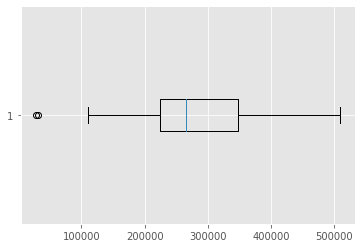

In [280]:
import matplotlib.pyplot as plt

plt.boxplot(dfAutos['Precio'], vert= False)
plt.show

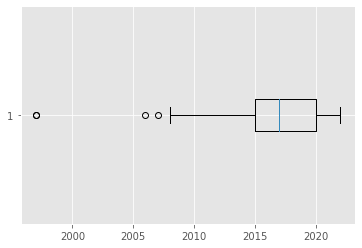

In [281]:
plt.boxplot(dfAutos['Año'], vert= False)
plt.show()

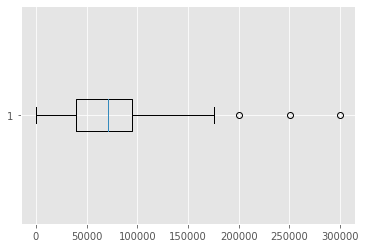

In [282]:
plt.boxplot(dfAutos['Kilometraje'], vert= False)
plt.show()

Continuacion de **análisis exploratorio** donde a traves de una gráfica se encuentra una estrecha relacion entre el precio y el kilometraje del auto. También se puede inferir que la **transmisión automatica** tiende a devaluarse ligeramente más rápido

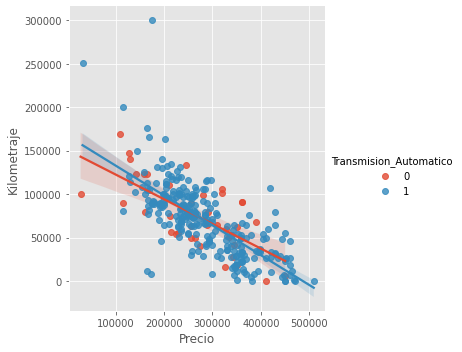

In [283]:
import seaborn as sns

sns.lmplot(x= 'Precio', y= 'Kilometraje', hue='Transmision_Automatico', data= dfAutos)


Elaboración de la **matriz de correlacion de pearson**. Al existir una cantidad alta de variables debido a los valores dummy (los cuales no generan correlación significativa) se procede a rehacer la matriz sin estos valores.

**OJO: En la parte final del proyecto se explica por que optó por dejar los valores dummy aun sin tener correlación fuerte con otras variables.**

In [284]:
corr_matrix = dfAutos.corr()
corr_matrix

,Precio,Año,Kilometraje,Estado_ Aguascalientes,Estado_ Baja California,Estado_ Baja California Sur,Estado_ Chihuahua,Estado_ Coahuila,Estado_ Colima,Estado_ Distrito Federal,...,Estado_ San Luis Potosí,Estado_ Sinaloa,Estado_ Sonora,Estado_ Tabasco,Estado_ Tamaulipas,Estado_ Tlaxcala,Estado_ Veracruz,Estado_ Zacatecas,Transmision_Automatico,Transmision_Estandar
Precio,1.000000,0.895474,-0.720769,0.019647,-0.027978,0.043917,0.089790,-0.039577,0.017351,-0.139015,...,0.058774,0.141372,0.026957,-0.106039,-0.068193,0.024520,0.041194,0.040811,0.082703,-0.082703
Año,0.895474,1.000000,-0.688458,0.032311,-0.126742,0.051871,0.092187,-0.017964,0.003752,-0.054923,...,0.024054,0.104108,0.035113,-0.076159,-0.180911,0.036619,0.063510,0.053052,0.101405,-0.101405
Kilometraje,-0.720769,-0.688458,1.000000,0.009465,-0.070697,-0.025627,-0.086514,-0.028904,0.008206,0.085351,...,-0.011560,-0.065330,-0.030765,0.257969,0.117910,0.044195,-0.055624,-0.049297,-0.056468,0.056468
Estado_ Aguascalientes,0.019647,0.032311,0.009465,1.000000,-0.011265,-0.009183,-0.011265,-0.009183,-0.006483,-0.072274,...,-0.013029,-0.017321,-0.017321,-0.009183,-0.009183,-0.006483,-0.009183,-0.006483,-0.042945,0.042945
Estado_ Baja California,-0.027978,-0.126742,-0.070697,-0.011265,1.000000,-0.007940,-0.009740,-0.007940,-0.005605,-0.062489,...,-0.011265,-0.014976,-0.014976,-0.007940,-0.007940,-0.005605,-0.007940,-0.005605,-0.061965,0.061965
Estado_ Baja California Sur,0.043917,0.051871,-0.025627,-0.009183,-0.007940,1.000000,-0.007940,-0.006472,-0.004569,-0.050939,...,-0.009183,-0.012208,-0.012208,-0.006472,-0.006472,-0.004569,-0.006472,-0.004569,0.030464,-0.030464
Estado_ Chihuahua,0.089790,0.092187,-0.086514,-0.011265,-0.009740,-0.007940,1.000000,-0.007940,-0.005605,-0.062489,...,-0.011265,-0.014976,-0.014976,-0.007940,-0.007940,-0.005605,-0.007940,-0.005605,0.037371,-0.037371
Estado_ Coahuila,-0.039577,-0.017964,-0.028904,-0.009183,-0.007940,-0.006472,-0.007940,1.000000,-0.004569,-0.050939,...,-0.009183,-0.012208,-0.012208,-0.006472,-0.006472,-0.004569,-0.006472,-0.004569,0.030464,-0.030464
Estado_ Colima,0.017351,0.003752,0.008206,-0.006483,-0.005605,-0.004569,-0.005605,-0.004569,1.000000,-0.035961,...,-0.006483,-0.008618,-0.008618,-0.004569,-0.004569,-0.003226,-0.004569,-0.003226,0.021506,-0.021506
Estado_ Distrito Federal,-0.139015,-0.054923,0.085351,-0.072274,-0.062489,-0.050939,-0.062489,-0.050939,-0.035961,1.000000,...,-0.072274,-0.096080,-0.096080,-0.050939,-0.050939,-0.035961,-0.050939,-0.035961,0.153827,-0.153827


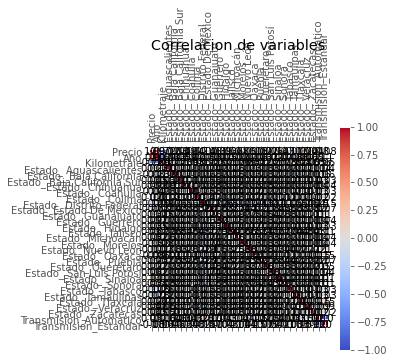

In [285]:
plt.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlacion de variables', loc='center', pad=90)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, rotation=90)
plt.yticks(range(corr_matrix.shape[0]), corr_matrix.columns)
for i in range(len(corr_matrix.columns)):
  for j in range(len(corr_matrix.columns)):
    plt.text(i,j,round(corr_matrix.iloc[i,j], 2), ha="center", va="center")
plt.colorbar()
plt.show()

En la nueva matríz de correlación se observan correlaciones positivas importantes en las variables **Año** y **Precio** y correlaciones negativas entre la variable **Kilometraje** y el conjunto **Año - Precio**

               Precio       Año  Kilometraje
Precio       1.000000  0.895474    -0.720769
Año          0.895474  1.000000    -0.688458
Kilometraje -0.720769 -0.688458     1.000000


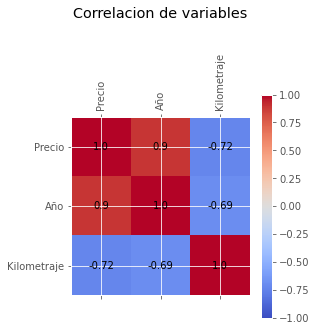

In [286]:
#Nueva  matriz de correlación
dfAutos_temp =dfAutos[['Precio', 'Año', 'Kilometraje']]
new_corr_matrix = dfAutos_temp.corr()
print(new_corr_matrix)

plt.matshow(new_corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlacion de variables', loc='center', pad=90)
plt.xticks(range(new_corr_matrix.shape[1]), new_corr_matrix.columns, rotation=90)
plt.yticks(range(new_corr_matrix.shape[0]), new_corr_matrix.columns)
for i in range(len(new_corr_matrix.columns)):
  for j in range(len(new_corr_matrix.columns)):
    plt.text(i,j,round(new_corr_matrix.iloc[i,j], 2), ha="center", va="center")
plt.colorbar()
plt.show()

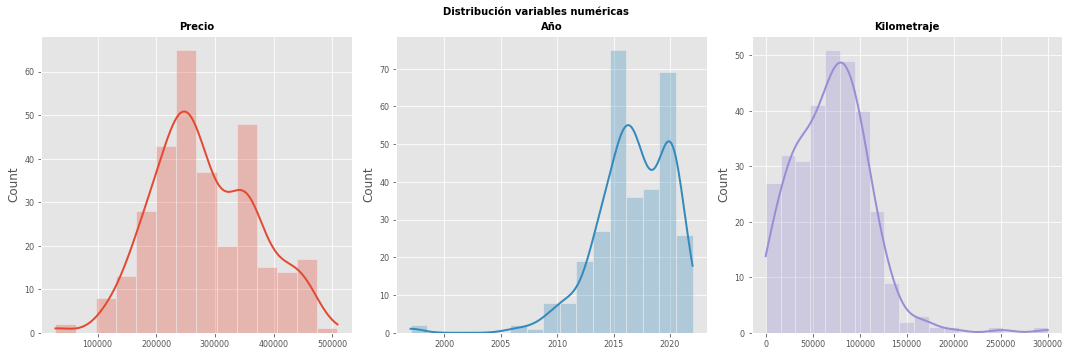

In [287]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flat
columnas_numeric = dfAutos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = dfAutos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

División del conjuntos de datos en datos de prueba y de entrenamiento

In [288]:
x= dfAutos.drop('Precio', axis=1)
y= dfAutos['Precio']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    train_size = 0.8,
    random_state= 0
)

Entrenamiento del modelo mediante regresión lineal múltiple

In [289]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(x_train, y_train)



LinearRegression()

Generación de predicciones

In [290]:
prediction = modelo.predict(x_test)
prediction

array([455250.00419693, 253467.31022483, 299020.55889066, 336203.08880709,
       384605.98546313, 203046.24544331, 362781.66277734, 289963.32695014,
       364821.74243627, 374497.24283668, 265750.60101784, 236043.14777272,
       371751.57377522, 257810.47559779, 351055.64970064, 295024.2587897 ,
       161562.52598505, 217044.45180473, 247365.97141075, 299989.46916961,
       346248.32036503, 244820.83707142, 297017.30072585, 275901.66518542,
       326853.14541177, 327977.41111608, 246688.93013259, 279763.15155599,
       262478.97990771, 297080.6699125 , 336065.9981179 , 149857.17263418,
       353338.74430343, 294383.31499525, 305365.17290531, 211179.02351519,
       206738.5988055 , 203793.84733667, 355258.35253961, 363796.66694593,
       353398.86202305, 271955.46248038, 292476.4086058 , 237701.48802824,
       209627.11233267, 113535.09876727, 304290.31245794, 262326.53713892,
       275546.86804491, 309131.13143881, 342625.49925795, 279375.17376036,
       353513.83756309, 1

**CALCULO DE PRESICIÓN DEL MODELO**
En este punto se trabajó con tres conjuntos de datos distintos:


*   Dataset con todas las columnas generadas
*   Dataset con todas las columnas excepto estado (se supuso que la locación no influía mucho)
*   Dataset con todas las columnas excepto estado y transmisión

Se crearon modelos para cada uno de estos conjuntos para verificar cual aportaba mayor presición al modelo por lo que se llegó a la conclusion de que el dataset con **todas las columnas generadas** aportaba mejor presición al modelo (**86.3%**)






In [291]:
print('presicion del modelo:')
print(modelo.score(x_train, y_train))   #presicion con variables transmisión= 0.827
                                        #presicion con variable trans y estado=0.863
                                        #presicion sin variables trasn y estado= 0.847

presicion del modelo:
0.8735416385988255


Se genera una entrada de prueba suponiendo un vehiculo Toyota Corolla 2014  con 80,000 Km y transmisión automática procedente de la CDMX. Posteriormente se introduce al modelo para predecir su posible precio el cual arroja un valor de ***$213,118.91***. Si se revisa el siguiente enlace **(shorturl.at/BJTUX)** con el mismo filtro se puede observar que el valor predicho está ligeramente arriba, muy probablemente debido a la cantidad reducida de datos disponibles para el entrenamiento del modelo.

In [292]:
nvo_auto = pd.DataFrame(np.array([[2014,80000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]]))
nvo_auto
# print(y_test, '\n\n')
# print(prediction)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2014,80000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [293]:
modelo.predict(nvo_auto)

array([213118.91249334])

Serialización en archivo binario del modelo con la librería Pickle

In [294]:
import pickle

pickle.dump(modelo, open('Autos_ML.sav', 'wb'))